# 07 Mean, Median and Mode

### Using the Garmin Vivofit Dataset

### Overview
<span>
    <table>
        <tr><td>Import the dataset<td><tr>
        <tr><td>Mean<td><tr>
        <tr><td>Median<td><tr>
        <tr><td>Mode<td><tr>
    <table>
<span>

### Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from IPython.display import display, HTML

# turn on data table rendering
pd.set_option('display.notebook_repr_html', True)
plt.style.use('ggplot')
pd.__version__

'1.4.2'

## Data

In [5]:
# Load 248 days of step data and vivofit goals
data = pd.read_csv('data\garmin-vivofit.csv', index_col='date')
data.head()

,steps,goal,Unnamed: 3,Unnamed: 4
date,,,,
4/25/2014,9936,4994,NaN,NaN
4/26/2014,7465,5294,NaN,NaN
4/27/2014,9437,5610,NaN,NaN
4/28/2014,8368,5946,NaN,NaN
4/29/2014,10254,6302,NaN,NaN


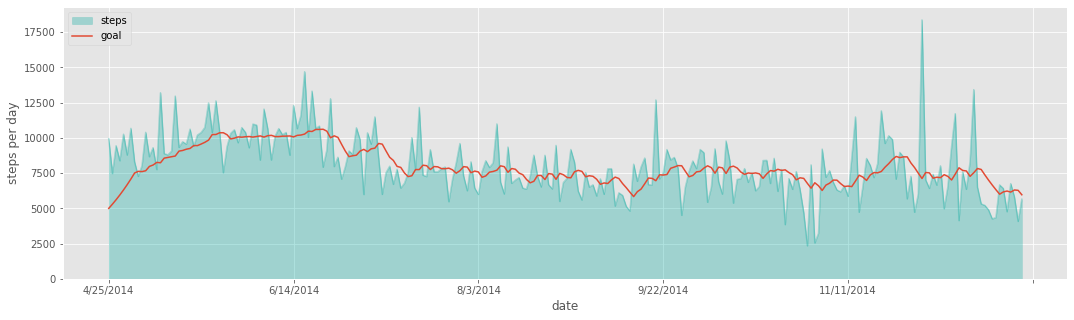

In [3]:
# Plot the steps and goal data
data.steps.plot(kind='area', figsize=(18,5), color='#00A99D', alpha=.3)
data.goal.plot()
plt.ylabel('steps per day')
plt.legend(loc='upper left')

## Calculate the mean
The arithmetic mean is the most commonly used measure of central tendency. The Greek letter $\mu$ (mu) is used to represent the population mean. To calculate the mean, we sum up all values $x_0+x_1+x_n$ and divide it by the number of values $n$.

$$\mu= \frac{1}{n}\sum_{i=0}^n x_i$$


In [4]:
# Note: This is ITM (Initialize Then Modify, see: https://www.youtube.com/watch?v=KTIl1MugsSY)
# can we do better?


# Calculate the mean
sum, n = 0.0, 0

for number_of_steps in data.steps:
    sum += number_of_steps

n = len(data.steps)

mean = sum / n
mean

8059.653225806452

In [5]:
# We can also let pandas use NumPy's mean function to do the job
data.steps.mean()

8059.653225806452

In [6]:
# Or we can call NumPy's mean function ourselves
np.mean(data.steps)

8059.653225806452

In [7]:
# Use pandas to get the mean for all columns at ones
data.mean()

steps         8059.653226
goal          7932.141129
Unnamed: 3            NaN
Unnamed: 4            NaN
dtype: float64

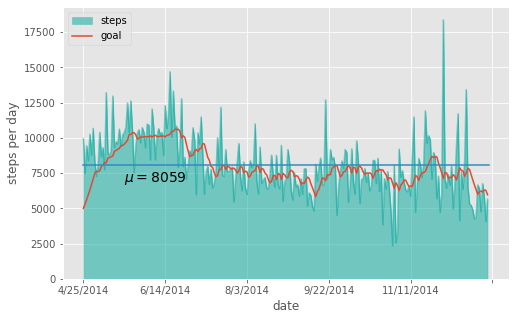

In [8]:
# Plot the mean, togehter with the steps and goal data
data.steps.plot(kind='area', color='#00A99D', alpha=.5, figsize=(8,5))
data.goal.plot(legend=True)
plt.plot([0, len(data.steps)],[mean, mean])
plt.ylabel('steps per day')
plt.text(25, mean-1200, r'$\mu=' + str(int(math.floor(mean))) + '$', fontsize=14)
plt.legend(loc='upper left')

## Calculate the median
The median is often a better measure of central tendency when we have extreme outliers. The median is the value in the middle after we sort the data. This is why outliers do not influence the median as much as they do the mean. If the number of observations $n$ is even, we have to take the mean of the two middle values. We calculate for a zero based index.


$$n\ is\ odd:\ \ x_{median}=x_{\frac{n-1}{2}}$$

$$n\ is\ even:\ \ x_{median}=\frac{x_\frac{n-2}{2}+x_\frac{n}{2}}{2}$$


In [9]:
median, n = 0.0, 0

# Get the number of observations
n = len(data.steps)

# order the data
ordered_data = data.steps.sort_values()
midpoint = n/2

if n % 2 == 0:
    # n is even
    # take the last element of first half and first element of second have 
    # so midpoint-1 and midpoint - because the array is zero based
    m1 = ordered_data.iat[int(midpoint-1)]
    m2 = ordered_data.iat[int(midpoint)] 
    median = (m1 + m2) / 2.0
else:
    # n is odd
    median = ordered_data.iat[int(midpoint)]

median

7810.0

In [10]:
# Again, we can let pandas use NumPy's median function to do the job
data.steps.median()

7810.0

In [11]:
# Or we can call NumPy's median function ourselves
np.median(data.steps)

7810.0

In [12]:
  # Use pandas to get the median for all columns at ones
data.median()

steps         7810.0
goal          7619.5
Unnamed: 3       NaN
Unnamed: 4       NaN
dtype: float64

## Calculate the Mode
The mode is one or more values which occur most often in the series. This measure of central tendency is especially meaningful when you have a lot of repeated data points (like five-star ratings, day numbers). For the Garmin Vivofit data, however, this holds a problem, because we seldom have the same step count on a particular day. In that case we could categorize our data into range buckets, like 0-1000, 1000-2000 steps, and count the frequencies of the observations in the buckets. Choosing the right bucket size can be tricky, because we can obscure the data or miss the 'real' mode.

In [13]:
# Let's create a lambda that assigns a bucket of size 1000 steps
# to each of the step count in the data set
bucket_size = 1000

# shaurya: I have no clue how this is working...
bucket_calculator = lambda x: int(x) / bucket_size * bucket_size

data['bucket'] = data.steps.apply(bucket_calculator)

data['bucket'].head()


date
4/25/2014     9936.0
4/26/2014     7465.0
4/27/2014     9437.0
4/28/2014     8368.0
4/29/2014    10254.0
Name: bucket, dtype: float64

In [14]:
data['steps'].head()

date
4/25/2014     9936
4/26/2014     7465
4/27/2014     9437
4/28/2014     8368
4/29/2014    10254
Name: steps, dtype: int64

<AxesSubplot:>

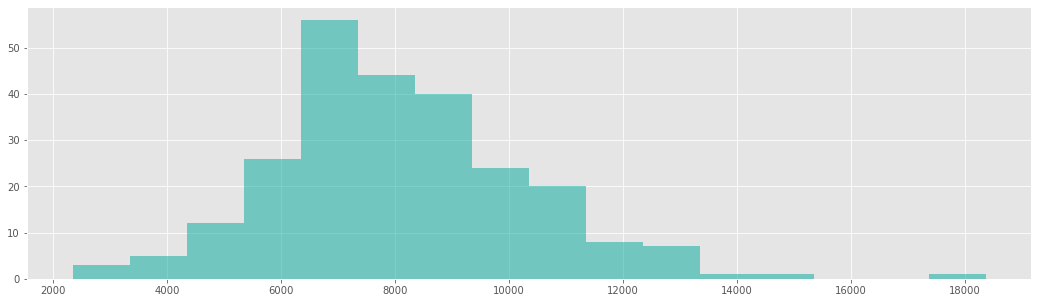

In [15]:
bucket_min = data.steps.min()
bucket_max = data.steps.max()
bins = int((bucket_max-bucket_min)/bucket_size) #gotta give 'em integer vals or that bins argument below blows up

data.bucket.hist(color='#00A99D', alpha=.5, bins=bins, figsize=(18,5))


In [16]:
print('Mode:', data.groupby('steps').steps.count().idxmax(), \
      'with bucket size', bucket_size)

Mode: 6243 with bucket size 1000


In [17]:
# mode needs scipy, so...
from scipy import stats
stats.mode(data.steps)


ModeResult(mode=array([6243], dtype=int64), count=array([2]))

In [18]:
# use pandas
data.steps.mode()

0     6243
1     6532
2    11482
Name: steps, dtype: int64

### Done!

#### Next: _Variance and Standard Deviation_